In [1]:
import os

os.chdir('../../')

In [2]:
import pandas as pd

STEAM_DATA_DIR = 'Dataset/steam/data'

games = pd.read_csv(os.path.join(STEAM_DATA_DIR, 'games.csv'))
recommendations = pd.read_csv(os.path.join(STEAM_DATA_DIR, 'recommendations.csv'))
users = pd.read_csv(os.path.join(STEAM_DATA_DIR, 'users.csv'))

In [3]:
games.head(10)

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True
5,250180,METAL SLUG 3,2015-09-14,True,False,False,Very Positive,90,5579,7.99,7.99,0.0,True
6,253980,Enclave,2013-10-04,True,True,True,Mostly Positive,75,1608,4.99,4.99,0.0,True
7,271850,Men of War: Assault Squad 2 - Deluxe Edition u...,2014-05-16,True,False,False,Mixed,61,199,6.99,6.99,0.0,True
8,282900,Hyperdimension Neptunia Re;Birth1,2015-01-29,True,False,False,Very Positive,94,9686,14.99,14.99,0.0,True
9,19810,The Sum of All Fears,2008-10-10,True,False,False,Mostly Positive,75,33,9.99,9.99,0.0,True


In [4]:
recommendations.head(10)

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id
0,975370,0,0,2022-12-12,True,36.3,51580,0
1,304390,4,0,2017-02-17,False,11.5,2586,1
2,1085660,2,0,2019-11-17,True,336.5,253880,2
3,703080,0,0,2022-09-23,True,27.4,259432,3
4,526870,0,0,2021-01-10,True,7.9,23869,4
5,306130,0,0,2021-10-10,True,8.6,45425,5
6,238960,0,0,2017-11-25,True,538.8,88282,6
7,730,0,0,2021-11-30,False,157.5,63209,7
8,255710,0,0,2021-05-21,True,18.7,354512,8
9,289070,0,0,2020-05-26,True,397.5,454422,9


In [5]:
users.head(10)

,user_id,products,reviews
0,7360263,359,0
1,14020781,156,1
2,8762579,329,4
3,4820647,176,4
4,5167327,98,2
5,5664667,145,5
6,5889167,447,2
7,7281762,1083,1
8,7445952,273,1
9,7462927,51,1


# Temporal Analysis

In [8]:
recommendations['date'] = pd.to_datetime(recommendations['date'])

In [9]:
user_temporal_activity = recommendations.groupby('user_id')['date'].agg(['min', 'max'])
user_temporal_activity.columns = ['first_interaction', 'last_interaction']

Generating visualizations...


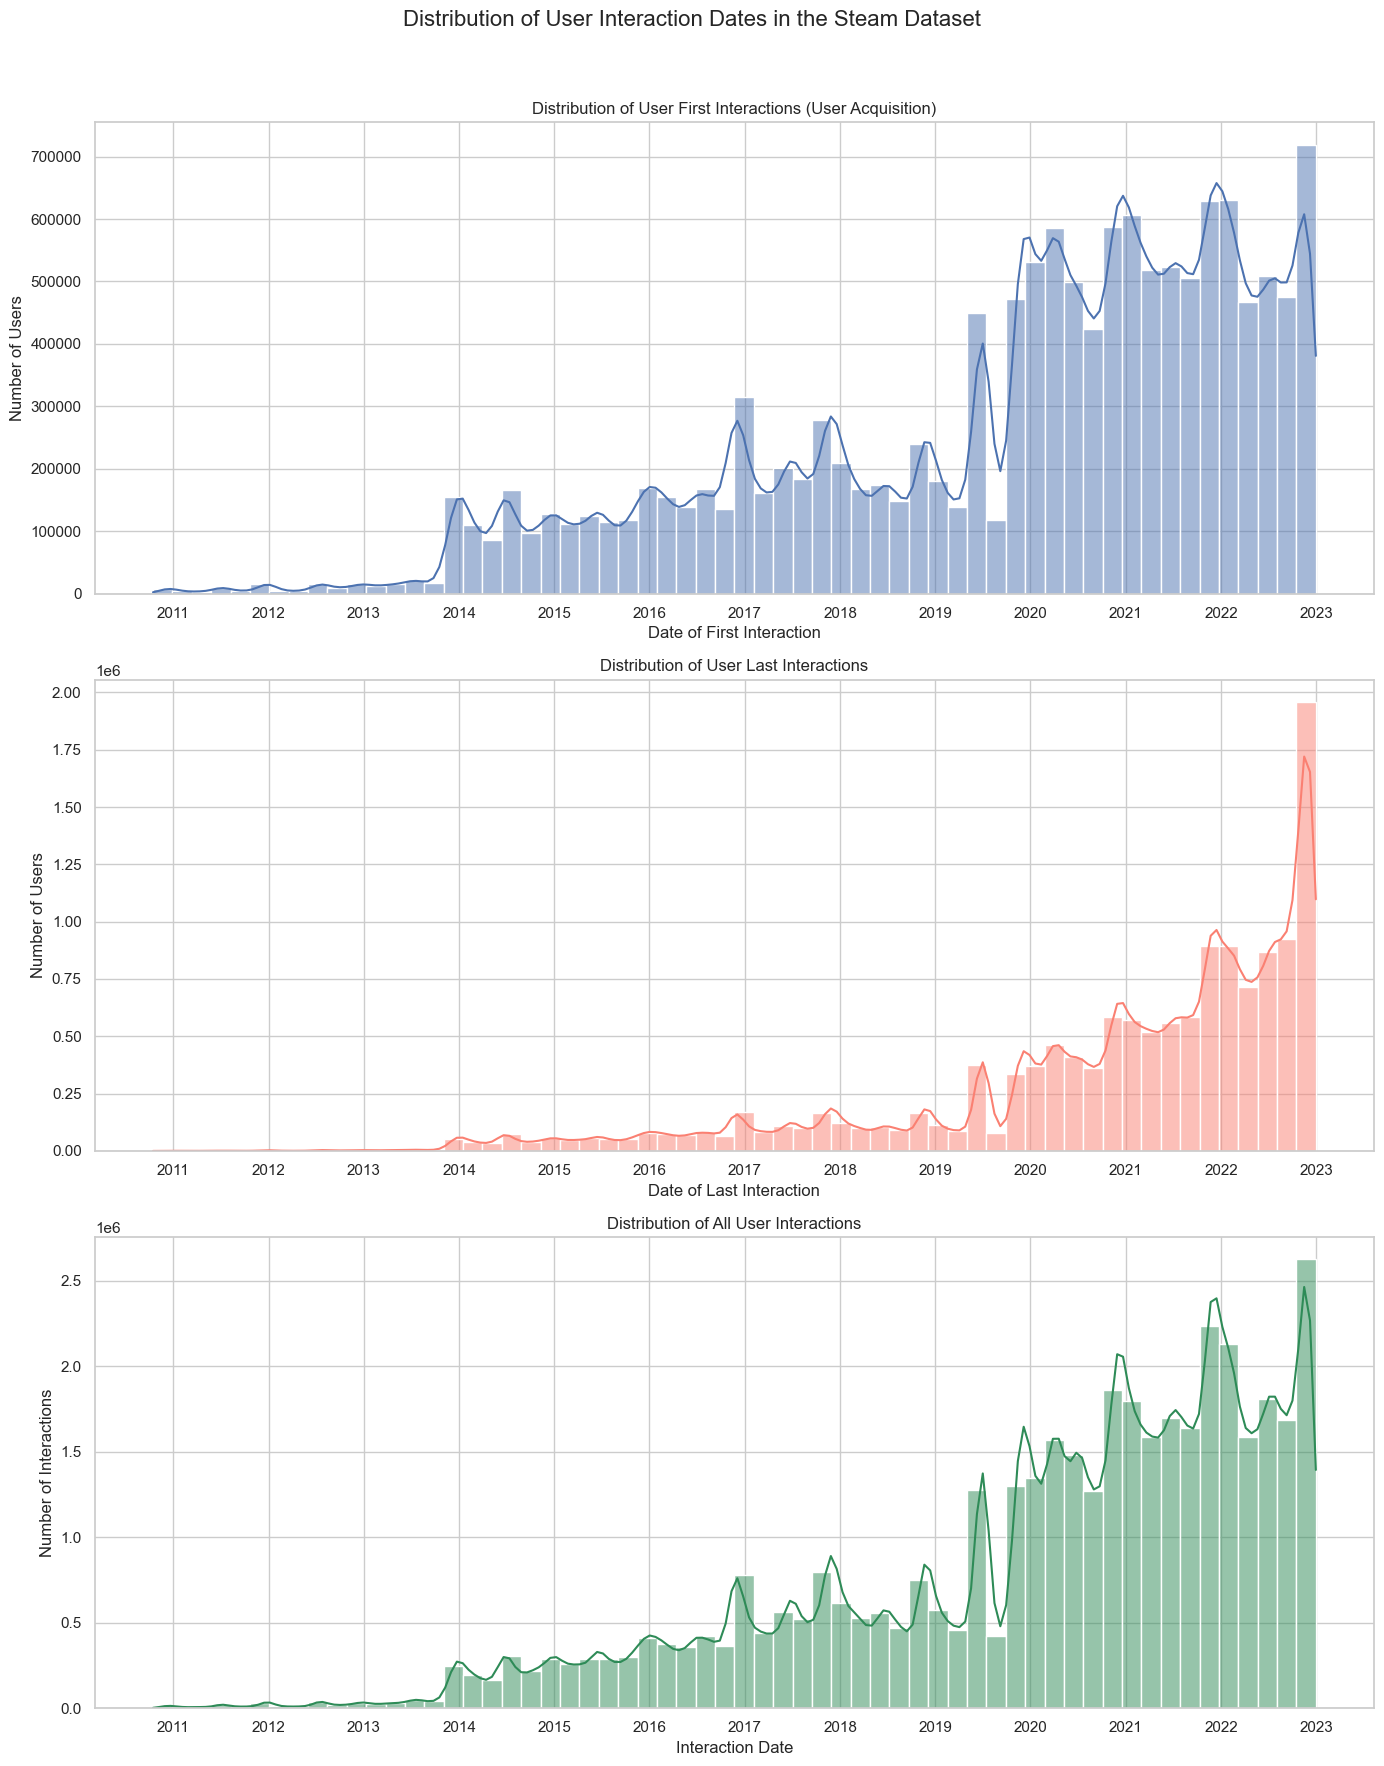


Analysis complete.


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

print("Generating visualizations...")
sns.set_theme(style="whitegrid")

# Create a figure with two subplots
fig, axes = plt.subplots(3, 1, figsize=(14, 18))
fig.suptitle('Distribution of User Interaction Dates in the Steam Dataset', fontsize=16)

# Plot the distribution of first interaction dates
sns.histplot(data=user_temporal_activity, x='first_interaction', ax=axes[0], bins=60, kde=True)
axes[0].set_title('Distribution of User First Interactions (User Acquisition)')
axes[0].set_xlabel('Date of First Interaction')
axes[0].set_ylabel('Number of Users')
axes[0].xaxis.set_major_locator(mdates.YearLocator())
axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))


# Plot the distribution of last interaction dates
sns.histplot(data=user_temporal_activity, x='last_interaction', ax=axes[1], bins=60, kde=True, color='salmon')
axes[1].set_title('Distribution of User Last Interactions')
axes[1].set_xlabel('Date of Last Interaction')
axes[1].set_ylabel('Number of Users')
axes[1].xaxis.set_major_locator(mdates.YearLocator())
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Plot the distribution of all interaction dates
sns.histplot(data=recommendations, x='date', ax=axes[2], bins=60, kde=True, color='seagreen')
axes[2].set_title('Distribution of All User Interactions')
axes[2].set_xlabel('Interaction Date')
axes[2].set_ylabel('Number of Interactions')
axes[2].xaxis.set_major_locator(mdates.YearLocator())
axes[2].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Improve layout and display the plots
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

print("\nAnalysis complete.")


In [22]:
print(recommendations['date'].describe(percentiles=[0.1, 0.25, 0.5, 0.6, 0.75, 0.9]))

count                         41154794
mean     2020-02-12 18:14:56.361188352
min                2010-10-15 00:00:00
10%                2016-07-07 00:00:00
25%                2018-10-29 00:00:00
50%                2020-10-08 00:00:00
60%                2021-03-27 00:00:00
75%                2021-12-05 00:00:00
90%                2022-08-13 00:00:00
max                2022-12-31 00:00:00
Name: date, dtype: object


## Splitting based on time
Our objective now is creating an URM for training and an URM for testing, for later matrix factorization. To do so, I'll choose for now arbitrarely the 60% of interactions. 

Moreover, for now, each review is considered as an implicit interaction.

In [ ]:
split_date = recommendations['date'].quantile(0.6)
print(f"Split date for training and testing: {split_date}")

training_set = recommendations[recommendations['date'] < split_date]
testing_set = recommendations[recommendations['date'] >= split_date]

train_users = set(training_set['user_id'].unique())
test_users = set(testing_set['user_id'].unique())

# Calculate overlap
returning_users = len(train_users.intersection(test_users))
new_test_users = len(test_users - train_users)

print(f"Split Date: {split_date.date()}")
print(f"Users in Training Set: {len(train_users)}")
print(f"Users in Test Set: {len(test_users)}")
print(f"Returning Users (in train & test): {returning_users} ({returning_users/len(test_users):.1%})")
print(f"New 'Cold Start' Users (only in test): {new_test_users} ({new_test_users/len(test_users):.1%})")

Split date for training and testing: 2021-03-27 00:00:00
Split Date: 2021-03-27
Users in Training Set: 8972663
Users in Test Set: 7748690
Returning Users (in train & test): 2940294 (37.9%)
New 'Cold Start' Users (only in test): 4808396 (62.1%)


In [ ]:
split_date = recommendations['date'].quantile(0.75)
print(f"Split date for training and testing: {split_date}")

training_set = recommendations[recommendations['date'] < split_date]
testing_set = recommendations[recommendations['date'] >= split_date]

train_users = set(training_set['user_id'].unique())
test_users = set(testing_set['user_id'].unique())

# Calculate overlap
returning_users = len(train_users.intersection(test_users))
new_test_users = len(test_users - train_users)

print(f"Split Date: {split_date.date()}")
print(f"Users in Training Set: {len(train_users)}")
print(f"Users in Test Set: {len(test_users)}")
print(f"Returning Users (in train & test): {returning_users} ({returning_users/len(test_users):.1%})")
print(f"New 'Cold Start' Users (only in test): {new_test_users} ({new_test_users/len(test_users):.1%})")

Split date for training and testing: 2021-12-05 00:00:00
Split Date: 2021-12-05
Users in Training Set: 10840741
Users in Test Set: 5547787
Returning Users (in train & test): 2607469 (47.0%)
New 'Cold Start' Users (only in test): 2940318 (53.0%)
